In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

# alternatively:
# Base.classes.keys()

['measurement', 'station']

In [9]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [10]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Use `engine.execute` to select and display the first 10 rows from the station table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [13]:
# Reflect Database into ORM class
# We can view all of the classes that automap found
# Save references to each table

Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station
Measurement = Base.classes.measurement

In [17]:
# Start a session to query the database
# Create our session (link) from Python to the DB

session = Session(engine)

In [14]:
# Draft queries

# results = session.query\
    # (Station.station, Station.name, Station.latitude, Station.latitude Station.longitude Station.elevation)\
    # .order_by(Station.station.desc()).all()

# results = session.query\
    # (Measurement.station, Station.date, Station.prcp, Station.tobs)\
    # .order_by(Measurement.station.desc()).all()


sqlalchemy.ext.automap.measurement

# Exploratory Climate Analysis

Design a query to retrieve the last 12 months of precipitation data and plot the results

In [131]:
# Calculate the date 1 year ago from the last data point in the database
precipitation_results = session.query\
    (Measurement.date, Measurement.prcp)\
    .order_by(Measurement.date.desc()).all()

precipitation_results

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [132]:
# Calculate the date 1 year ago from the last data point in the database
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [133]:
# Perform a query to retrieve the data and precipitation scores
precipitation_results = session.query\
    (Measurement.date, Measurement.prcp)\
    .order_by(Measurement.date.asc())\
    .filter(Measurement.date>=prev_year).all()

#precipitation_results

In [134]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

year_of_rain_with_index = pd.DataFrame(precipitation_results, columns=['date', 'prcp'])
year_of_rain_with_index.set_index(year_of_rain_with_index['date'], inplace=True, )
year_of_rain_with_index.head(3)

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,0.15
2016-08-23,2016-08-23,0.05


Text(0, 0.5, 'Precipitation (mm)')

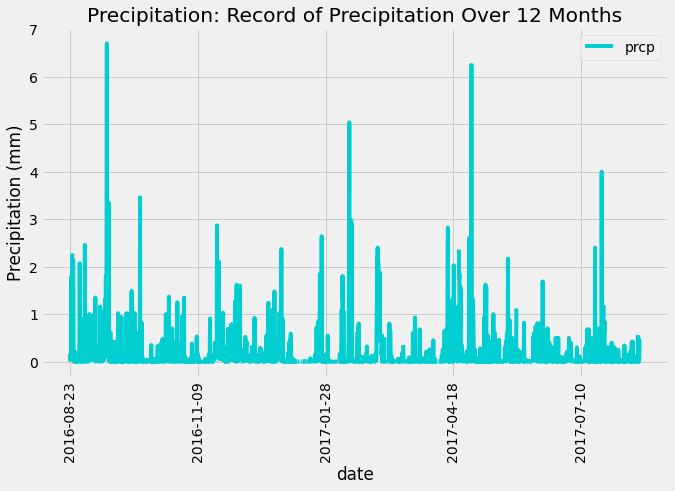

In [46]:
# # Use Pandas Plotting with Matplotlib to plot the data

year_of_rain_with_index.plot(x='date', y='prcp', rot = 90, kind='line', figsize=(10,6), color='darkturquoise',\
     title="Precipitation: Record of Precipitation Over 12 Months")
plt.ylabel("Precipitation (inches)")

Use Pandas to calcualte the summary statistics for the precipitation data

In [135]:
year_of_rain = pd.DataFrame(precipitation_results, columns=['date', 'prcp'])
year_of_rain.set_index('date', inplace=True, )
year_of_rain.index = pd.to_datetime(year_of_rain.index, format='%Y-%m-%d')
year_of_rain.head(3)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05


In [136]:
year_of_rain_groupby_month = year_of_rain.groupby(([year_of_rain.index.year, year_of_rain.index.month]), as_index=True)

year_of_rain_summary = year_of_rain_groupby_month.agg({'prcp': ["mean", "median", "var", "std", "sem"]})
# year_of_rain_summary.round(2)

# re-align the headings so the columns headings can be re-named
year_of_rain_summary.columns = year_of_rain_summary.columns.droplevel(0)
year_of_rain_summary.rename(columns={"mean": "Precipitation Mean (inches)",\
                                    "median": "Precipitation Median (inches)", \
                                    "var": "Precipitation Variance (inches)", \
                                    "std": "Precipitation Standard Deviation (inches)", \
                                    "sem": "Precipitation SEM",}, inplace=True)

year_of_rain_summary.index.rename(['Year','Month'], inplace=True)

year_of_rain_summary = year_of_rain_summary.round(2)
year_of_rain_summary

Precipitation Mean (inches)  Precipitation Median (inches)  \
Year Month                                                               
2016 8                             0.39                           0.08   
     9                             0.29                           0.07   
     10                            0.12                           0.01   
     11                            0.12                           0.02   
     12                            0.20                           0.06   
2017 1                             0.07                           0.00   
     2                             0.24                           0.00   
     3                             0.18                           0.00   
     4                             0.32                           0.02   
     5                             0.15                           0.02   
     6                             0.12                           0.02   
     7                             0.13                           0.02   
     8                             0.06                           0.00   

            Precipitation Variance (inches)  \
Year Month                                    
2016 8                                 0.49   
     9                                 0.44   
     10                                0.12   
     11                                0.12   
     12                                0.12   
2017 1                                 0.08   
     2                                 0.45   
     3                                 0.19   
     4                                 0.49   
     5                                 0.10   
     6                                 0.05   
     7                                 0.15   
     8                                 0.02   

            Precipitation Standard Deviation (inches)  Precipitation SEM  
Year Month                                                                
2016 8                                           0.70               0.10  
     9                                           0.66               0.05  
     10                                          0.34               0.03  
     11                                          0.34               0.03  
     12                                          0.34               0.03  
2017 1                                           0.28               0.02  
     2                                           0.67               0.05  
     3                                           0.43               0.03  
     4                                           0.70               0.05  
     5                                           0.32               0.02  
     6                                           0.22               0.02  
     7                                           0.39               0.03  
     8                                           0.13               0.01

Design a query to show how many stations are available in this dataset:
- What are the most active stations? (i.e. what stations have the most rows)?
- List the stations and the counts in descending order.

In [181]:
# Design a query to show how many stations are available in this dataset?

stations_results = session.query\
    (Measurement.station, Station.name)\
    .order_by(Station.name.asc()).all()

stations_results

[('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC0051

In [182]:
station_data = pd.DataFrame(stations_results, columns=['station', 'name'])
station_data.head(3)

,station,name
0,USC00519397,"HONOLULU OBSERVATORY 702.2, HI US"
1,USC00519397,"HONOLULU OBSERVATORY 702.2, HI US"
2,USC00519397,"HONOLULU OBSERVATORY 702.2, HI US"


In [183]:
list_unique_stations = station_data["station"].unique()
list_unique_stations

array(['USC00519397', 'USC00513117', 'USC00514830', 'USC00517948',
       'USC00518838', 'USC00519523', 'USC00519281', 'USC00511918',
       'USC00516128'], dtype=object)

In [184]:
number_of_unique_stations = len(station_data["station"].unique())
number_of_unique_stations

9

In [185]:
list_unique_stations = pd.DataFrame(station_data["station"].unique())
list_unique_stations.rename(columns={0: 'List of Unique Stations'}, inplace=True)
list_unique_stations

,List of Unique Stations
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [195]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_data_grouped = station_data.groupby(['station'], as_index=True)
station_data_grouped = station_data_grouped.size()
station_data_grouped_df = pd.DataFrame(station_data_grouped)
station_data_grouped_df.rename(columns={0: "Station Activity (Number of Data Entries)"}, inplace=True)

# Sort the stations and the counts in descending order
station_data_grouped_df = station_data_grouped_df.sort_values("Station Activity (Number of Data Entries)", ascending=False)

station_data_grouped_df

,Station Activity (Number of Data Entries)
station,
USC00519281,24948
USC00519397,24516
USC00513117,24381
USC00519523,24021
USC00516128,23508
USC00514830,19818
USC00511918,17811
USC00517948,12348
USC00518838,4599


Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station.

In [200]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# USC00519281	

station_USC00519281_results = session.query\
    (Measurement.station, Measurement.tobs)\
    .order_by(Measurement.tobs.desc())\
    .filter(Measurement.station == 'USC00519281').all()

station_USC00519281_results

[('USC00519281', 85.0),
 ('USC00519281', 84.0),
 ('USC00519281', 83.0),
 ('USC00519281', 83.0),
 ('USC00519281', 83.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281',

In [201]:
USC00519281_data = pd.DataFrame(station_USC00519281_results, columns=['station', 'tobs'])
USC00519281_data.head(3)

,station,tobs
0,USC00519281,85.0
1,USC00519281,84.0
2,USC00519281,83.0


In [241]:
USC00519281_df = USC00519281_data.groupby(('station'), as_index=True)

USC00519281_summary = USC00519281_df.agg({'tobs': ["min", "max", "mean", "median"]})
USC00519281_summary = USC00519281_summary.round(1)

# re-align the headings so the columns headings can be re-named
USC00519281_summary.columns = USC00519281_summary.columns.droplevel(1)

USC00519281_summary.rename(columns={"tobs": "Minimum Temperature (Fahrenheit)",\
                                    "tobs": "Maximum Temperature (Fahrenheit)",\
                                    "tobs": "Mean Temperature (Fahrenheit)",\
                                    "tobs": "Median Temperature (Fahrenheit)"}, inplace=True)

#USC00519281_summary.index.rename(['Station_USC00519281'], inplace=True)
# USC00519281_summary.index.rename(['Station'], inplace=True)

USC00519281_summary

,Median Temperature (Fahrenheit),Median Temperature (Fahrenheit),Median Temperature (Fahrenheit),Median Temperature (Fahrenheit)
station,,,,
USC00519281,54.0,85.0,71.7,72.0


Choose the station with the highest number of temperature observations and thenquery the last 12 months of temperature observation data for this station. Plot the results as a histogram.

In [243]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# USC00519281	

station_USC00519281_yearly_results = session.query\
    (Measurement.station, Measurement.tobs, Measurement.date)\
    .order_by(Measurement.date.desc())\
    .filter(Measurement.station == 'USC00519281').all()

station_USC00519281_yearly_results

[('USC00519281', 79.0, '2017-08-18'),
 ('USC00519281', 76.0, '2017-08-17'),
 ('USC00519281', 76.0, '2017-08-16'),
 ('USC00519281', 77.0, '2017-08-15'),
 ('USC00519281', 77.0, '2017-08-14'),
 ('USC00519281', 77.0, '2017-08-13'),
 ('USC00519281', 83.0, '2017-08-06'),
 ('USC00519281', 82.0, '2017-08-05'),
 ('USC00519281', 77.0, '2017-08-04'),
 ('USC00519281', 76.0, '2017-07-31'),
 ('USC00519281', 81.0, '2017-07-30'),
 ('USC00519281', 82.0, '2017-07-29'),
 ('USC00519281', 81.0, '2017-07-28'),
 ('USC00519281', 76.0, '2017-07-27'),
 ('USC00519281', 75.0, '2017-07-26'),
 ('USC00519281', 77.0, '2017-07-25'),
 ('USC00519281', 75.0, '2017-07-24'),
 ('USC00519281', 82.0, '2017-07-23'),
 ('USC00519281', 77.0, '2017-07-22'),
 ('USC00519281', 77.0, '2017-07-21'),
 ('USC00519281', 77.0, '2017-07-20'),
 ('USC00519281', 76.0, '2017-07-19'),
 ('USC00519281', 76.0, '2017-07-18'),
 ('USC00519281', 76.0, '2017-07-17'),
 ('USC00519281', 80.0, '2017-07-16'),
 ('USC00519281', 80.0, '2017-07-15'),
 ('USC005192

In [244]:
# Calculate the date 1 year ago from the last data point in the database
prev_year_USC00519281 = dt.date(2017, 8, 18) - dt.timedelta(days=365)

In [246]:
station_USC00519281_yearly_results = session.query\
    (Measurement.station, Measurement.tobs, Measurement.date)\
    .order_by(Measurement.date.desc())\
    .filter(Measurement.station == 'USC00519281')\
    .filter(Measurement.date>=prev_year_USC00519281).all()

station_USC00519281_yearly_results

[('USC00519281', 79.0, '2017-08-18'),
 ('USC00519281', 76.0, '2017-08-17'),
 ('USC00519281', 76.0, '2017-08-16'),
 ('USC00519281', 77.0, '2017-08-15'),
 ('USC00519281', 77.0, '2017-08-14'),
 ('USC00519281', 77.0, '2017-08-13'),
 ('USC00519281', 83.0, '2017-08-06'),
 ('USC00519281', 82.0, '2017-08-05'),
 ('USC00519281', 77.0, '2017-08-04'),
 ('USC00519281', 76.0, '2017-07-31'),
 ('USC00519281', 81.0, '2017-07-30'),
 ('USC00519281', 82.0, '2017-07-29'),
 ('USC00519281', 81.0, '2017-07-28'),
 ('USC00519281', 76.0, '2017-07-27'),
 ('USC00519281', 75.0, '2017-07-26'),
 ('USC00519281', 77.0, '2017-07-25'),
 ('USC00519281', 75.0, '2017-07-24'),
 ('USC00519281', 82.0, '2017-07-23'),
 ('USC00519281', 77.0, '2017-07-22'),
 ('USC00519281', 77.0, '2017-07-21'),
 ('USC00519281', 77.0, '2017-07-20'),
 ('USC00519281', 76.0, '2017-07-19'),
 ('USC00519281', 76.0, '2017-07-18'),
 ('USC00519281', 76.0, '2017-07-17'),
 ('USC00519281', 80.0, '2017-07-16'),
 ('USC00519281', 80.0, '2017-07-15'),
 ('USC005192

In [282]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

# Measurement.station, Measurement.tobs, Measurement.date

# year_of_rain_USC00519281 = pd.DataFrame(station_USC00519281_yearly_results, columns=['station', 'tobs', 'date'])
# year_of_rain_USC00519281.set_index(year_of_rain_USC00519281['date'], inplace=True, )
# year_of_rain_USC00519281.head(3)


year_of_rain_USC00519281 = pd.DataFrame(station_USC00519281_yearly_results, columns=['station', 'tobs', 'date'])
year_of_rain_USC00519281.head(3)

,station,tobs,date
0,USC00519281,79.0,2017-08-18
1,USC00519281,76.0,2017-08-17
2,USC00519281,76.0,2017-08-16


In [284]:
year_of_rain_USC00519281 = year_of_rain_USC00519281[['tobs', 'date']]
year_of_rain_USC00519281.head(3)

,tobs,date
0,79.0,2017-08-18
1,76.0,2017-08-17
2,76.0,2017-08-16


In [280]:
# year_of_rain_USC00519281.index = pd.to_datetime(year_of_rain_USC00519281.index, format='%Y-%m-%d')

# year_of_rain_USC00519281 = pd.to_datetime(year_of_rain_USC00519281, format='%Y-%m-%d')

Text(0, 0.5, 'Temperature (Fahrenheit)')

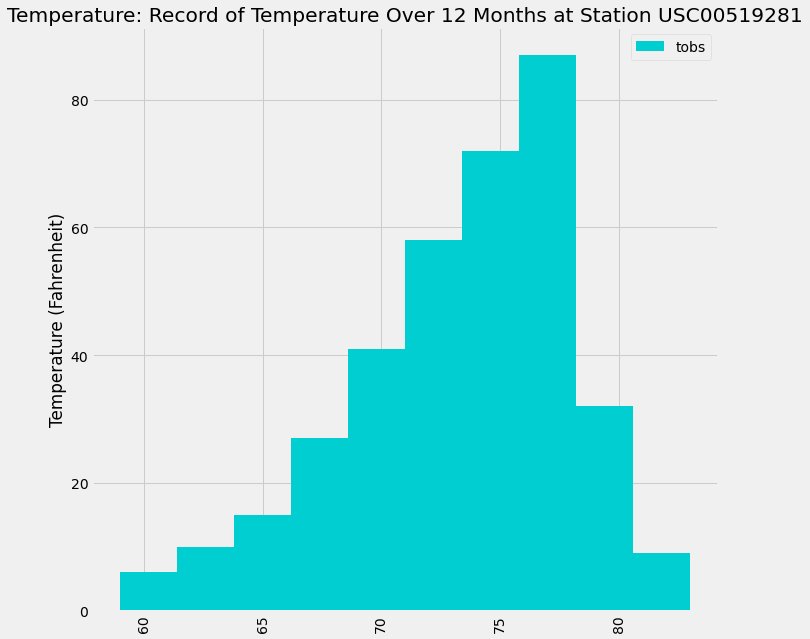

In [286]:
# # Use Pandas Plotting with Matplotlib to plot the data

# year_of_rain_USC00519281.plot(x='date', y='tobs', rot = 90, kind='hist', figsize=(10,10), color='darkturquoise',\
#      title="Temperature: Record of Temperature Over 12 Months at Station USC00519281")
# plt.ylabel("Temperature (Fahrenheit)")

year_of_rain_USC00519281.plot(x='date', y='tobs', rot = 90, kind='hist', figsize=(10,10), color='darkturquoise',\
     title="Temperature: Record of Temperature Over 12 Months at Station USC00519281")
plt.ylabel("Temperature (Fahrenheit)")